#### Implementing an Linear Regression Model using pytorch with Dataset from sklearn

In [10]:
! pip install torch
! pip install matplotlib
! pip install seaborn
%pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/57/ed/f607ebf69f87bcce2e3fa329bd78da8cafd3d51190a19d58012d2d7f2252/scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/3e/df/963384e90733e08eac978cd103c34df181d1fec424de383cdc443f418dd4/scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     -------------------------------------- 60.6/60.6 kB 645.4 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from http


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn import datasets

Text(0, 0.5, 'Y')

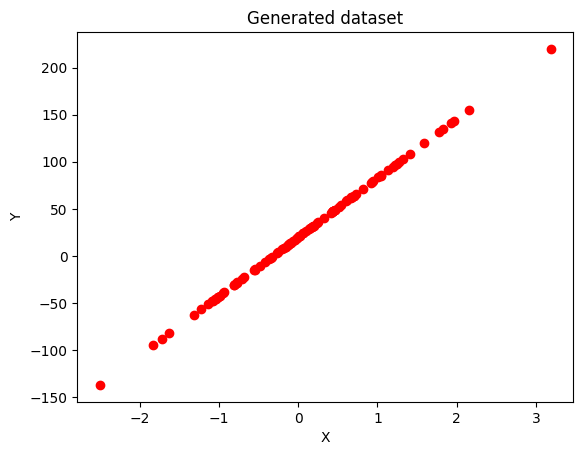

In [53]:
# Create a dataset
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, bias = 20,  random_state=23)

# Convert the numpy arrays to PyTorch tensors
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# Reshape the y tensor to be a 2D tensor because this is the shape that the linear layer expects
y = y.view(y.shape[0],1)

# Create a test dataset
X_test = torch.tensor([5], dtype=torch.float32)


# Plot the dataset
plt.plot(x_numpy, y_numpy, 'ro')
plt.title("Generated dataset")
plt.xlabel("X")
plt.ylabel("Y")

In [54]:
# Model

n_samples, n_features = x.shape  
input_size = n_features
output_size = 1

# Linear regression model class 
class LinearRegression(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinearRegression,self).__init__()
        self.lin = nn.Linear(input_size, output_size)

    def forward(self,x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

loss = nn.MSELoss()
lr_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = lr_rate)

n_iters = 100

for epoch in range(n_iters):

    pred = model(x)

    l = loss(pred,y)
    l.backward()

    optimizer.step()
    optimizer.zero_grad()

    if epoch % 2 == 0:
        [weights, bias] = model.parameters()
        print(model.parameters())
        print(f'epoch {epoch + 1}, weights: {weights[0][0].item(): .3f}, loss: {l:.3f}')

print(f'Predition after training: {model(X_test).item()}')


<generator object Module.parameters at 0x000002461C870580>
epoch 1, weights:  0.340, loss: 4364.414
<generator object Module.parameters at 0x000002461C870580>
epoch 3, weights:  2.667, loss: 4027.906
<generator object Module.parameters at 0x000002461C870580>
epoch 5, weights:  4.906, loss: 3717.663
<generator object Module.parameters at 0x000002461C870580>
epoch 7, weights:  7.060, loss: 3431.613
<generator object Module.parameters at 0x000002461C870580>
epoch 9, weights:  9.132, loss: 3167.848
<generator object Module.parameters at 0x000002461C870580>
epoch 11, weights:  11.126, loss: 2924.612
<generator object Module.parameters at 0x000002461C870580>
epoch 13, weights:  13.045, loss: 2700.291
<generator object Module.parameters at 0x000002461C870580>
epoch 15, weights:  14.891, loss: 2493.396
<generator object Module.parameters at 0x000002461C870580>
epoch 17, weights:  16.667, loss: 2302.557
<generator object Module.parameters at 0x000002461C870580>
epoch 19, weights:  18.377, loss:

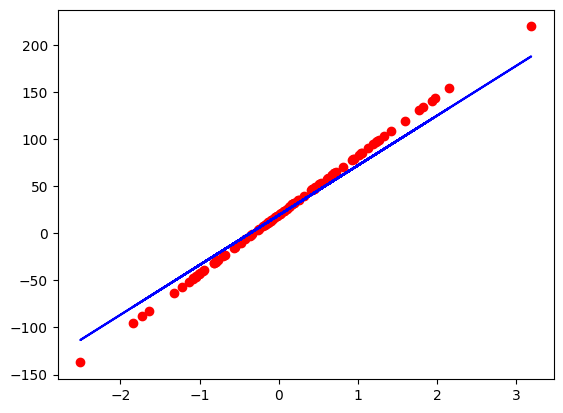

In [60]:
#Plot the linear regression model 

predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')